In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv("/Dataset - Company_data.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <a list of 10 Patch objects>)

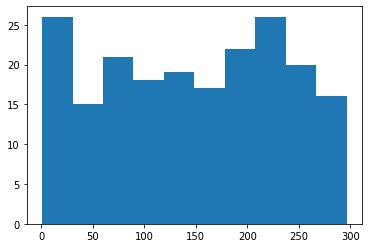

In [6]:
plt.hist(data['TV'])

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

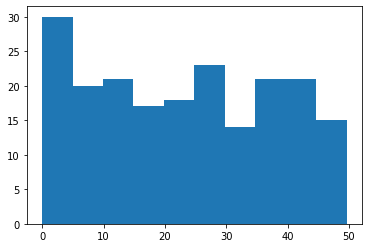

In [ ]:
plt.hist(data['Radio'])

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <a list of 10 Patch objects>)

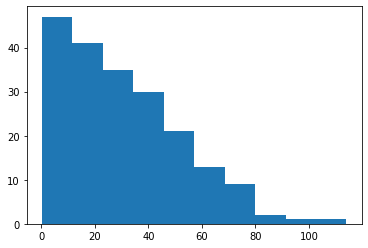

In [ ]:
plt.hist(data['Newspaper'])

(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

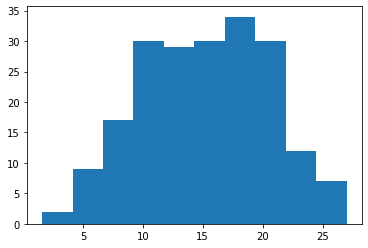

In [ ]:
plt.hist(data['Sales'])

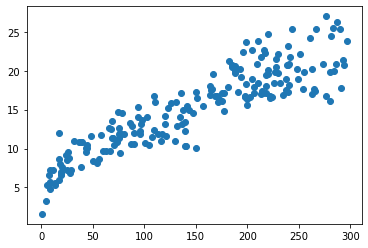

In [ ]:
plt.scatter(x=data['TV'],y=data['Sales'])

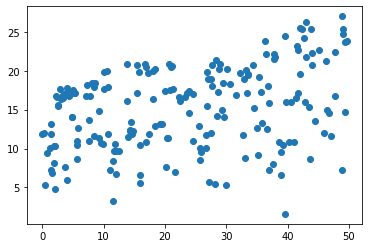

In [ ]:
plt.scatter(x=data['Radio'],y=data['Sales'])

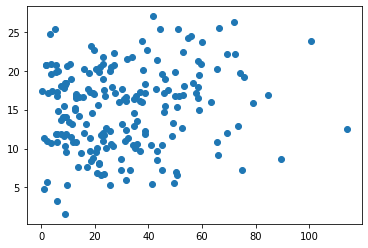

In [ ]:
plt.scatter(x=data['Newspaper'],y=data['Sales'])

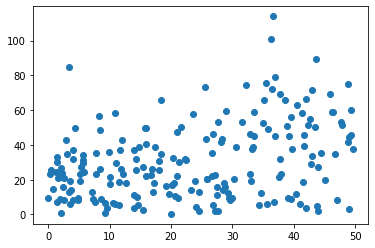

In [ ]:
plt.scatter(x=data['Radio'],y=data['Newspaper'])

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['TV'], data['Radio'])
print(corr)

0.05480866446583011


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fa047af18d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa047a81690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa047a8f2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa047a812d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa047a96910>,
  <matplotlib.lines.Line2D at 0x7fa047a96b10>]}

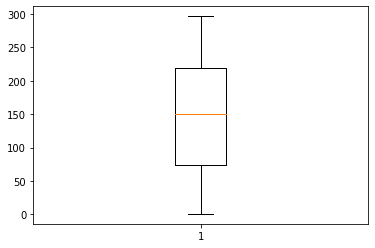

In [ ]:
plt.boxplot(x=data['TV'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa0479a4790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0479ac790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0479b3650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0479b3150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa0479a4cd0>,
  <matplotlib.lines.Line2D at 0x7fa0479ac250>]}

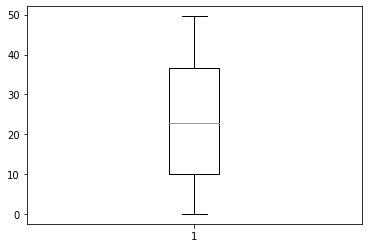

In [ ]:
plt.boxplot(x=data['Radio'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa047a36b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa047a3cb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0479c3b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0479c3650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa047a3c0d0>,
  <matplotlib.lines.Line2D at 0x7fa047a3c610>]}

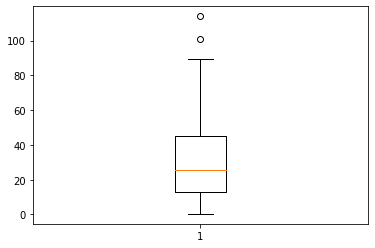

In [ ]:
plt.boxplot(x=data['Newspaper'])

#### **Q5(ii) SOLUTION**

####**PART A:Model 1**

In [ ]:
y=data.Sales
x=data['TV']

In [ ]:
x.head(),y.head()

(0    230.1
 1     44.5
 2     17.2
 3    151.5
 4    180.8
 Name: TV, dtype: float64, 0    22.1
 1    10.4
 2    12.0
 3    16.5
 4    17.9
 Name: Sales, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
train_x=train_x.reshape(-1,1)
test_x=test_x.reshape(-1,1)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape,

((140, 1), (60, 1), (140,), (60,))

In [ ]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           7.93e-74
Time:                        03:58:52   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(test_x)

array([ 8.79346736, 17.33415133,  7.96505308, 18.85202008, 18.93753381,
       19.46665002, 16.72486599, 18.31755925, 16.11558065,  9.56843555,
       17.70827391, 14.70994869,  8.69726441,  8.60106146, 18.32290386,
       14.76339477, 13.13328925, 15.99265466, 18.52599897, 12.09643525,
       22.80168557, 10.45029591, 12.47590244, 17.82585529, 14.49081975,
       17.30742829, 17.02416406, 12.85536962, 16.17971595, 19.40785933,
       21.31588448, 22.06412963,  7.48403834, 22.304637  , 22.91926695,
       14.54426583, 17.82585529, 14.81684085, 14.70460408, 19.95300937,
        8.73467667,  7.72454571, 11.55128521, 17.30208368, 14.7206379 ,
       10.26857923, 16.36143263, 11.44439305, 11.28939941, 22.74823949,
       18.7397833 , 18.53134358, 20.82952513,  8.18418202, 20.54091628,
       10.95268909, 17.8953352 , 17.61741557,  9.64326007, 21.89310217])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_y, model.predict(test_x))

6.369539061575784

In [ ]:
print("Train R squared", 1 - mean_squared_error(train_y, model.predict(train_x)) / mean_squared_error(train_y, [train_y.mean()]*train_y.shape[0]))
print("Test R squared", 1 - mean_squared_error(test_y, model.predict(test_x)) / mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

Train R squared 0.8174287344183201
Test R squared 0.7974775723064292


####**PART B:Model 2**

In [ ]:
y=data.Sales
x=data['Radio']

In [ ]:
x.head(),y.head()

(0    37.8
 1    39.3
 2    45.9
 3    41.3
 4    10.8
 Name: Radio, dtype: float64, 0    22.1
 1    10.4
 2    12.0
 3    16.5
 4    17.9
 Name: Sales, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
train_x=train_x.values.reshape(-1,1)
test_x=test_x.values.reshape(-1,1)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape,

((140, 1), (60, 1), (140,), (60,))

In [ ]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.88e-07
Time:                        04:13:25   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(test_x)

array([16.94911783, 14.74047421, 13.49540551, 16.39695693, 16.20207661,
       16.25621003, 15.23850169, 14.05839309, 12.60761738, 15.56330223,
       12.9432446 , 17.69615905, 16.6892774 , 14.98948795, 16.61349061,
       15.59578228, 15.3034618 , 12.35860364, 16.32117013, 16.81919762,
       15.26015506, 14.84874106, 12.54265728, 14.31823352, 12.48852386,
       12.41273707, 17.62037226, 14.04756641, 16.98159788, 16.6243173 ,
       15.10858148, 15.74735586, 14.92452785, 12.9432446 , 17.41466526,
       15.08692811, 15.95306286, 13.15977829, 16.41861029, 15.32511517,
       12.88911118, 16.2778634 , 12.32612359, 17.06821136, 16.28869008,
       13.21391171, 13.9176462 , 13.69028582, 15.94223618, 17.67450568,
       12.66175081, 17.63119895, 12.79167102, 13.83103272, 15.88810276,
       15.53082217, 13.83103272, 13.23556508, 12.69423086, 15.51999549])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_y, model.predict(test_x))

25.724989906579765

In [ ]:
print("Train R squared", 1 - mean_squared_error(train_y, model.predict(train_x)) / mean_squared_error(train_y, [train_y.mean()]*train_y.shape[0]))
print("Test R squared", 1 - mean_squared_error(test_y, model.predict(test_x)) / mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

Train R squared 0.09455071048106067
Test R squared 0.1369559979374243


#### **Part C: Model 3**

In [ ]:
y=data.Sales
x=data['Newspaper']

In [ ]:
x.head(),y.head()

(0    69.2
 1    45.1
 2    69.3
 3    58.5
 4    58.4
 Name: Newspaper, dtype: float64, 0    22.1
 1    10.4
 2    12.0
 3    16.5
 4    17.9
 Name: Sales, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
train_x=train_x.values.reshape(-1,1)
test_x=test_x.values.reshape(-1,1)

In [ ]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape,

((140, 1), (60, 1), (140,), (60,))

In [ ]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Sat, 10 Jul 2021   Prob (F-statistic):             0.0255
Time:                        04:18:54   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(test_x)

array([14.63495015, 15.63152663, 16.41298308, 16.2461553 , 17.25151218,
       16.2549357 , 14.17397865, 14.66129138, 14.79299752, 15.54811274,
       15.91688994, 16.46127533, 15.44713803, 14.50763421, 14.09495496,
       16.09688833, 14.44178114, 14.83689957, 15.59640499, 14.41104971,
       15.49982049, 14.02910189, 15.82469564, 14.34519663, 14.3144652 ,
       14.96421551, 14.33641623, 15.33738291, 14.9598253 , 14.29690438,
       14.21349049, 14.58226769, 14.30568479, 14.4022693 , 14.34080643,
       16.81688191, 15.05640981, 15.62713642, 14.09056476, 14.74470527,
       16.82566232, 16.14518059, 14.4944636 , 14.74031506, 16.81249171,
       15.31543189, 14.91153305, 16.50078717, 15.38128496, 15.96079199,
       15.91249973, 14.91153305, 15.82030543, 14.18275906, 15.58762458,
       14.00715087, 15.13104329, 15.94762137, 14.61738933, 16.56664024])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_y, model.predict(test_x))

30.390728544489193

In [ ]:
print("Train R squared", 1 - mean_squared_error(train_y, model.predict(train_x)) / mean_squared_error(train_y, [train_y.mean()]*train_y.shape[0]))
print("Test R squared", 1 - mean_squared_error(test_y, model.predict(test_x)) / mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

Train R squared 0.036673634119203546
Test R squared -0.010169247214272259


####**Q.5(iii) Model 4**

In [ ]:
y=data.Sales
X=data.drop('Sales',axis=1)

X.head()




,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [ ]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape,

((140, 3), (60, 3), (140,), (60,))

In [ ]:
pd.DataFrame(train_X).corr()

,TV,Radio,Newspaper
TV,1.000000,0.051979,0.030504
Radio,0.051979,1.000000,0.383284
Newspaper,0.030504,0.383284,1.000000


In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           8.13e-99
Time:                        04:21:58   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(test_X)

array([ 9.23263677, 14.18066884, 12.53344462, 19.02875868, 16.45486925,
       12.6462003 , 15.12633227, 22.03282828, 15.86587891, 22.31278034,
       21.43976156, 21.03814497, 24.86188506, 21.57259339, 10.36580852,
       19.63181525, 10.97592272, 20.891163  ,  9.6086213 , 11.7771405 ,
       10.2166722 , 14.80519426, 15.28391478, 12.17201404,  7.97780803,
       15.30154061,  7.84973954, 18.8283728 , 17.31834258,  6.33110078,
       11.22144256,  5.29449271, 24.77462362,  9.85071771, 17.2314715 ,
       21.37012517, 15.88919957, 21.58663605, 21.06355281, 10.79114289,
        8.89119863, 15.82129729,  8.12841394, 16.90858004, 24.05086655,
        9.64362793, 17.23493626, 19.52659871,  8.0371794 , 17.59207698,
        9.40419303, 20.65905786, 13.34204087, 21.40191261,  7.09924952,
       20.34372855, 11.31438063, 16.06236844, 14.05962743,  7.16154337])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_y, model.predict(test_X))

3.01194186144176

In [ ]:
print("Train R squared", 1 - mean_squared_error(train_y, model.predict(train_X)) / mean_squared_error(train_y, [train_y.mean()]*train_y.shape[0]))
print("Test R squared", 1 - mean_squared_error(test_y, model.predict(test_X)) / mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

Train R squared 0.9051150941406266
Test R squared 0.8949979784823594
